In [39]:
import pandas as pd
import datapackage
import scipy.stats as st
from pathlib import Path
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import linregress
import seaborn as sns


spotify_top_load = Path("Resources/universal_top_spotify_songs.csv")

# Read Universal_Top_Spotify_songs.csv
spotify_top = pd.read_csv(spotify_top_load)

# Import List of country codes
data_url = 'https://datahub.io/core/country-list/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)


                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]
                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]


# Data Cleaning

In [2]:
# To change the name of the "Code" column to "Country"
data = data.rename(columns={"Code":"country"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     249 non-null    object
 1   country  248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [3]:
# To merge the data set on the "country" column
spotify_top_complete = pd.merge(data,spotify_top, on="country")
spotify_top_complete.head()

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Argentina,AR,0Me3GyNuLOa1YTIxhJPyCn,ASI ES LA VIDA,"Enrique Iglesias, Maria Becerra",50,0,0,2023-10-24,81,...,3,-3.513,0,0.0556,0.6880,0.000002,0.1070,0.963,128.044,4
1,Argentina,AR,5FWQLEX0lavdxiWGBNkBQ4,Me Enteré,"Tiago PZK, TINI",49,0,1,2023-10-24,81,...,8,-3.814,1,0.1080,0.1210,0.000001,0.3140,0.612,140.978,3
2,Argentina,AR,4zYHsmc2V9RyR8eOA0mlx6,Penas de Antaño,"Bizarrap, Milo j",48,0,2,2023-10-24,83,...,7,-6.296,1,0.0933,0.6880,0.000104,0.2710,0.368,140.051,4
3,Argentina,AR,7BVMtLpd7edHeOizt4RWz9,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",47,0,3,2023-10-24,79,...,6,-4.515,1,0.0309,0.3650,0.000000,0.1120,0.393,149.918,4
4,Argentina,AR,7w7BrPbOjF5OxChs2dxFve,En La Intimidad | CROSSOVER #1,"Big One, Emilia, Callejero Fino",46,0,4,2023-10-24,81,...,1,-4.991,1,0.1070,0.0924,0.000000,0.0699,0.640,89.946,4


In [4]:
# Use the ".dropna" method to remove any missing values on the "country" and "name" columns
spotify_top_complete_v1 = spotify_top_complete.dropna(subset=['country','name'])
spotify_top_complete_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25122 entries, 0 to 25472
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                25122 non-null  object 
 1   country             25122 non-null  object 
 2   spotify_id          25122 non-null  object 
 3   name                25122 non-null  object 
 4   artists             25122 non-null  object 
 5   daily_rank          25122 non-null  int64  
 6   daily_movement      25122 non-null  int64  
 7   weekly_movement     25122 non-null  int64  
 8   snapshot_date       25122 non-null  object 
 9   popularity          25122 non-null  int64  
 10  is_explicit         25122 non-null  bool   
 11  duration_ms         25122 non-null  int64  
 12  album_name          25122 non-null  object 
 13  album_release_date  25122 non-null  object 
 14  danceability        25122 non-null  float64
 15  energy              25122 non-null  float64
 16  key      

In [5]:
# To remove any data with a different "snapshot_date" value different from "2023-10-24" and store the data on "spotify_top_complete_v2"
spotify_top_complete_v2 = spotify_top_complete_v1.loc[spotify_top_complete_v1['snapshot_date'] == '2023-10-24']
spotify_top_complete_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 25172
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3577 non-null   object 
 1   country             3577 non-null   object 
 2   spotify_id          3577 non-null   object 
 3   name                3577 non-null   object 
 4   artists             3577 non-null   object 
 5   daily_rank          3577 non-null   int64  
 6   daily_movement      3577 non-null   int64  
 7   weekly_movement     3577 non-null   int64  
 8   snapshot_date       3577 non-null   object 
 9   popularity          3577 non-null   int64  
 10  is_explicit         3577 non-null   bool   
 11  duration_ms         3577 non-null   int64  
 12  album_name          3577 non-null   object 
 13  album_release_date  3577 non-null   object 
 14  danceability        3577 non-null   float64
 15  energy              3577 non-null   float64
 16  key       

In [6]:
# To remove any data with values different from the ones in the "countries" list and store the clean data on "spotify_top_complete_v3"
countries = ['MX','CO','CL','US','CA','KR','TW','SG','FR','GB','RO']
spotify_top_complete_v3 =  spotify_top_complete_v2[spotify_top_complete_v2['country'].isin(countries)]

# To Display the clean data
spotify_top_complete_v3

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2800,Canada,CA,0PAcdVzhPO4gq1Iym9ESnK,Thinkin’ Bout Me,Morgan Wallen,50,0,0,2023-10-24,86,...,3,-5.775,0,0.0308,0.492000,0.000000,0.117,0.429,139.971,4
2801,Canada,CA,67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),"Travis Scott, Drake",49,0,1,2023-10-24,91,...,7,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,4
2802,Canada,CA,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,48,0,2,2023-10-24,93,...,10,-2.810,1,0.0336,0.049500,0.017700,0.101,0.398,124.053,4
2803,Canada,CA,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",47,0,3,2023-10-24,90,...,0,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,165.921,4
2804,Canada,CA,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,46,0,4,2023-10-24,92,...,7,-7.582,1,0.0919,0.492000,0.000016,0.118,0.453,68.534,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,2023-10-24,94,...,0,-7.746,1,0.0459,0.554000,0.000002,0.102,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,2023-10-24,95,...,4,-5.009,0,0.0680,0.150000,0.000402,0.580,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,2023-10-24,88,...,2,-7.683,0,0.1940,0.255000,0.000004,0.112,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,2023-10-24,100,...,9,-5.707,1,0.1570,0.117000,0.000021,0.105,0.564,169.994,4


In [7]:
# To display the data on the column "Name"
spotify_top_complete_v2['Name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bolivia, Plurinational State of', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan, Province of China', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'U

In [8]:
# To export the clean data
spotify_top_complete_v3.to_csv("output_data/spotify_v3.csv")

# We will group the countries by regions as follows:

* Asia =  Korea, Republic of , Taiwan , Singapore
* LatinAmerica = Mexico , Colombia , Chile
* Europa = France, United Kingdom ,  Romania
* North America = United States , Canada

In [9]:
# Define a dictionary to map countries to regions
country_to_region = {
    'KR': 'Asia',
    'TW': 'Asia',
    'SG': 'Asia',
    'MX': 'Latam',
    'CO': 'Latam',
    'CL': 'Latam',
    'FR': 'Europe',
    'GB': 'Europe',
    'RO': 'Europe',
    'US': 'NA',
    'CA': 'NA'
}

# To add the "region" column based on the mapping
spotify_top_complete_v3['region'] = spotify_top_complete_v3['country'].map(country_to_region)

/var/folders/vf/5t0z3x6j7z14ggb8h84tgcsc0000gn/T/ipykernel_61251/299923359.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_top_complete_v3['region'] = spotify_top_complete_v3['country'].map(country_to_region)


# René

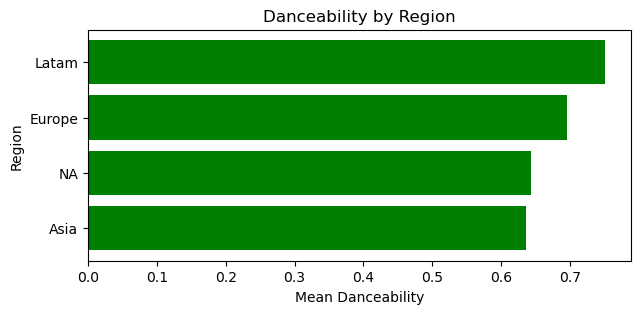

In [10]:
# To group the data by regions using the dictionary "country_to_region"
country_danceability = spotify_top_complete_v3.groupby('region')['danceability'].mean().reset_index()
country_danceability = country_danceability.sort_values(by='danceability', ascending=True)

# Bar graph to display the danceability by regions
plt.figure(figsize=(7,3
                    ))
plt.barh(country_danceability['region'], country_danceability['danceability'], color='green')
plt.title('Danceability by Region')
plt.xlabel('Mean Danceability')
plt.ylabel('Region')

plt.show()

In [11]:
# To display thhe most popular song in each country of our clean data
most_popular_song = spotify_top_complete_v3[spotify_top_complete_v3['popularity'] ==spotify_top_complete_v3['popularity'].max()]

# Display the most popular song
print(most_popular_song)

                            Name country              spotify_id  \
2846                      Canada      CA  1BxfuPKGuaTgP7aM0Bbdwr   
19918                  Singapore      SG  1BxfuPKGuaTgP7aM0Bbdwr   
22007  Taiwan, Province of China      TW  1BxfuPKGuaTgP7aM0Bbdwr   
23767             United Kingdom      GB  1BxfuPKGuaTgP7aM0Bbdwr   
24121              United States      US  1BxfuPKGuaTgP7aM0Bbdwr   

               name       artists  daily_rank  daily_movement  \
2846   Cruel Summer  Taylor Swift           4               0   
19918  Cruel Summer  Taylor Swift           5               0   
22007  Cruel Summer  Taylor Swift          16               0   
23767  Cruel Summer  Taylor Swift           6               0   
24121  Cruel Summer  Taylor Swift           2               0   

       weekly_movement snapshot_date  popularity  ...  loudness  mode  \
2846                46    2023-10-24         100  ...    -5.707     1   
19918               45    2023-10-24         100  ... 

In [12]:
# Top 15 songs by popularity globally
# To group the songs by name and sum the popilarity
grouped =spotify_top_complete_v2.groupby('name')['popularity'].sum().reset_index()

# To sort the grouped DataFrame by popularity in descending order
top_songs = grouped.sort_values(by='popularity', ascending=False)

# To display the top 15 songs
top_15_songs = top_songs.head(15)
print(top_15_songs)

                                                   name  popularity
1185                                        Si No Estás        4171
1507                                             greedy        4116
1242                                          Strangers        3822
996                                  Paint The Town Red        3696
1173                Seven (feat. Latto) (Explicit Ver.)        3038
301                                        Cruel Summer        3000
1440                                              Water        2511
343                                            Daylight        2375
593                                  IDGAF (feat. Yeat)        2325
876                               My Love Mine All Mine        2280
1447  What Was I Made For? [From The Motion Picture ...        2208
800                                              MONACO        2185
1226                                           Sprinter        2068
1036                                            

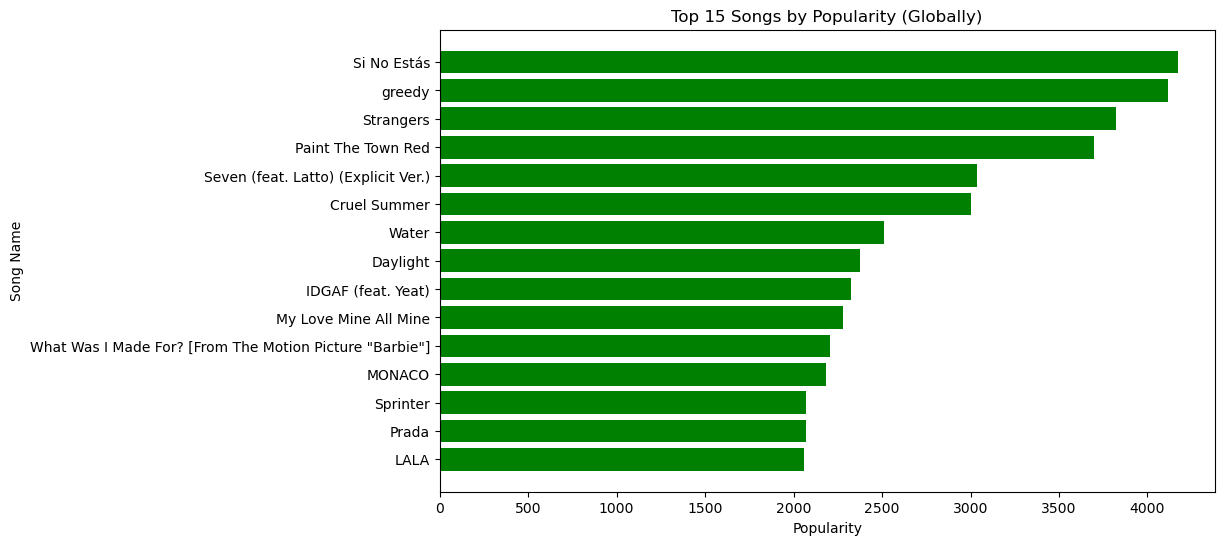

In [13]:
# To display a bar graph of the top 15 songs (globally) by popularity
plt.figure(figsize=(10, 6))
plt.barh(top_15_songs['name'], top_15_songs['popularity'], color='green')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.title('Top 15 Songs by Popularity (Globally)')
plt.gca().invert_yaxis()  # To display the highest popularity at the top
plt.show()

In [14]:
# Top 15 songs by popularity (region)
# To group the songs by name and sum the popilarity
grouped =spotify_top_complete_v3.groupby('name')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_songs2 = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 songs
top_15_songs2 = top_songs2.head(15)
print(top_15_songs2)

                                                  name  popularity
205                                 Paint The Town Red         704
328                                             greedy         686
271                                          Strangers         588
60                                        Cruel Summer         500
254                Seven (feat. Latto) (Explicit Ver.)         490
256                                        Si No Estás         485
181                              My Love Mine All Mine         475
172                                             MONACO         475
309                                              Water         465
278                                           TOO MUCH         430
325                                           fukumean         384
310  What Was I Made For? [From The Motion Picture ...         384
332                                            vampire         384
65             Dance The Night - From Barbie The Album        

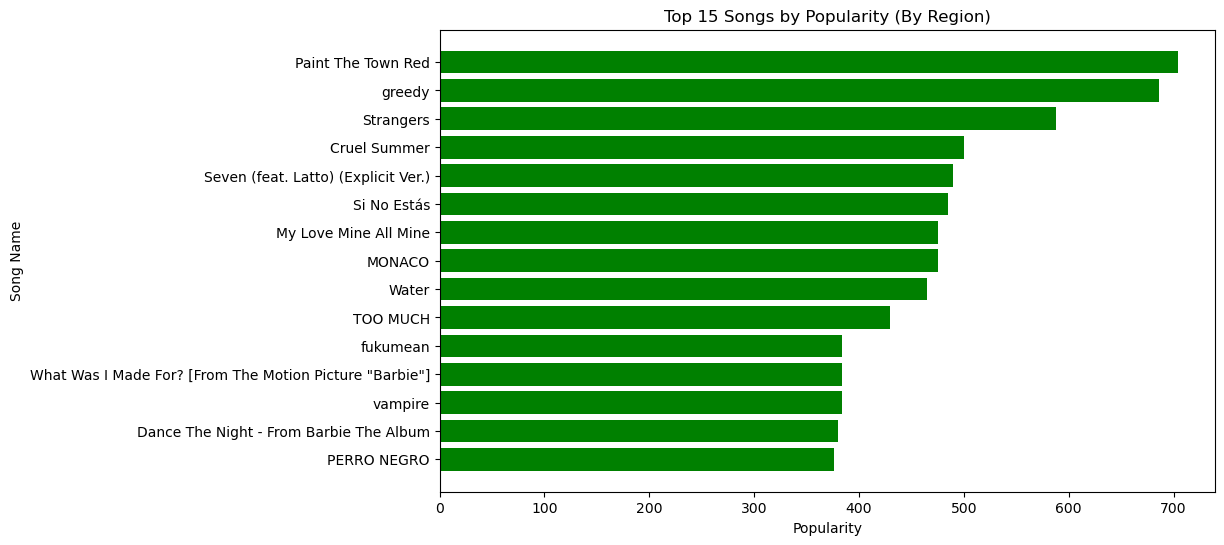

In [15]:
# To display a bar graph of the top 15 songs (region) by popularity
plt.figure(figsize=(10, 6))
plt.barh(top_15_songs2['name'], top_15_songs2['popularity'], color='green')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.title('Top 15 Songs by Popularity (By Region)')
plt.gca().invert_yaxis()  # To display the highest popularity at the top
plt.show()

In [16]:
# Top 15 artists by popularity (globally)
# To group the artists by name and sum the popilarity
grouped =spotify_top_complete_v2.groupby('artists')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_15_artists = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 artists
top_15_artists = top_15_artists.head(15)
print(top_15_artists)

               artists  popularity
151          Bad Bunny       11554
1175      Taylor Swift        6572
348           Doja Cat        4565
197   Bizarrap, Milo j        4396
1366    iñigo quintero        4171
1173        Tate McRae        4116
648        Kenya Grace        3822
609   Jung Kook, Latto        3038
1256                 V        3036
616            KAROL G        2823
1239              Tyla        2511
317      David Kushner        2375
365        Drake, Yeat        2325
918     Olivia Rodrigo        2284
832             Mitski        2280


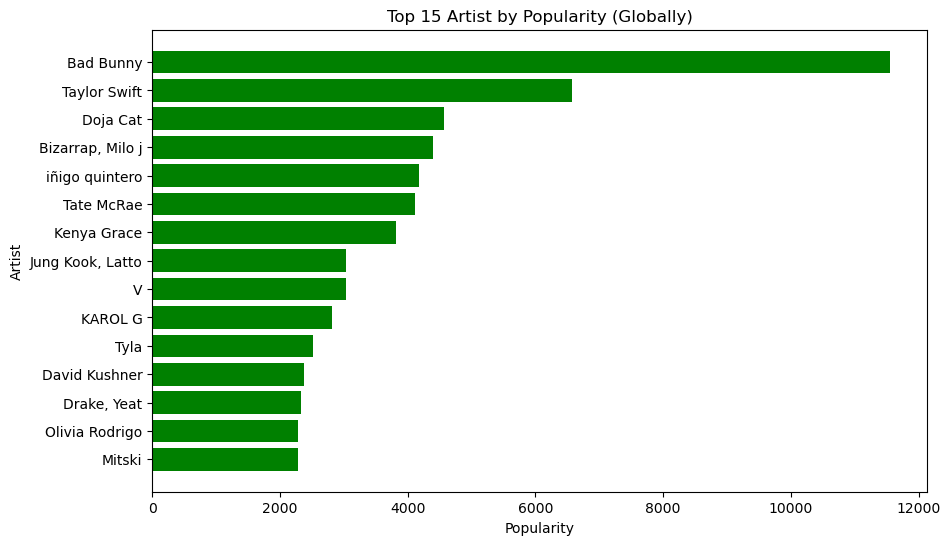

In [17]:
# To display a bar graph of the top 15 artists (globally) by popularity
plt.figure(figsize=(10, 6))
plt.barh(top_15_artists['artists'], top_15_artists['popularity'], color='green')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 15 Artist by Popularity (Globally)')
plt.gca().invert_yaxis()  # To display the highest popularity at the top
plt.show()

In [18]:
# Top 15 artists by popularity (region)
# To group the artists by name and sum the popilarity
grouped =spotify_top_complete_v3.groupby('artists')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_15_artists2 = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 artists
top_15_artists2 = top_15_artists2.head(15)
print(top_15_artists2)

              artists  popularity
220      Taylor Swift        2081
20          Bad Bunny        1081
59           Doja Cat        1020
242                 V         996
165          NewJeans         969
145   Lim Young Woong         797
100               IVE         797
218        Tate McRae         686
175    Olivia Rodrigo         664
203               SZA         644
125           KAROL G         606
160     Morgan Wallen         602
116             Jimin         600
132       Kenya Grace         588
37   Bizarrap, Milo j         528


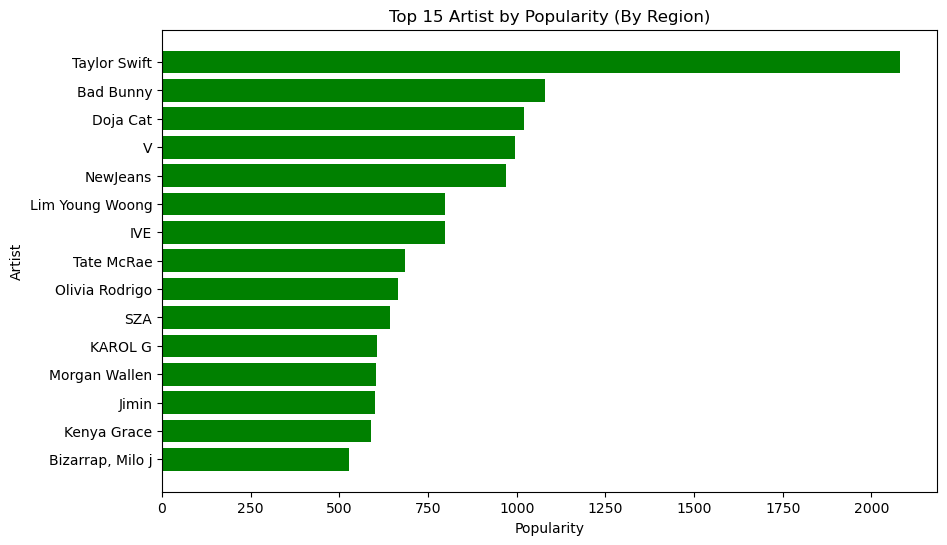

In [19]:
# To display a bar graph of the top 15 artists (region) by popularity
plt.figure(figsize=(10, 6))
plt.barh(top_15_artists2['artists'], top_15_artists2['popularity'], color='green')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 15 Artist by Popularity (By Region)')
plt.gca().invert_yaxis()  # To display the highest popularity at the top
plt.show()

In [20]:
# To get the popularity of Taylor Swift by regions
taylor_swift_songs = spotify_top_complete_v3[spotify_top_complete_v3['artists'] == 'Taylor Swift']

# Use the dictionary "country_to_region" to map the country to the region
taylor_swift_songs['region'] = taylor_swift_songs['country'].map(country_to_region)

# To group the data by region
taylor_swift_popularity_by_region = taylor_swift_songs.groupby('region')

# To sum the popularity of all of the countries within each region
popularity_by_regionTS = taylor_swift_popularity_by_region['popularity'].sum()
popularity_by_regionTS = popularity_by_regionTS.sort_values(ascending=False)

# To display the data
print(popularity_by_regionTS)

region
NA        1172
Asia       459
Europe     450
Name: popularity, dtype: int64


/var/folders/vf/5t0z3x6j7z14ggb8h84tgcsc0000gn/T/ipykernel_61251/2826384496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_swift_songs['region'] = taylor_swift_songs['country'].map(country_to_region)


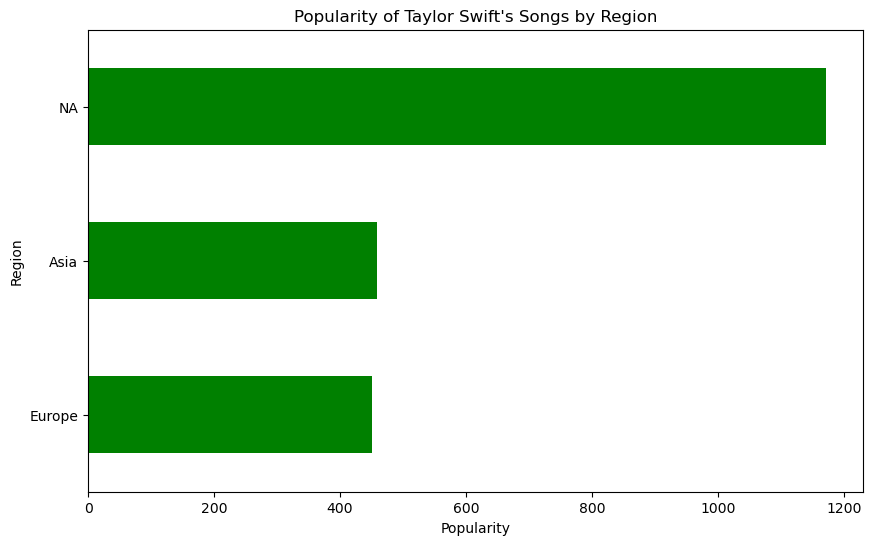

In [21]:
# To display a bar graph to compare the popularity of TS by region
plt.figure(figsize=(10, 6))
popularity_by_regionTS.plot(kind='barh', color='green')
plt.xlabel('Popularity')
plt.ylabel('Region')
plt.title('Popularity of Taylor Swift\'s Songs by Region')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Show the plot
plt.show()

In [22]:
# To get the popularity of Bad Bunny by regions
bad_bunny_songs = spotify_top_complete_v3[spotify_top_complete_v3['artists'] == 'Bad Bunny']

# Use the dictionary "country_to_region" to map the country to the region
bad_bunny_songs['region'] = bad_bunny_songs['country'].map(country_to_region)

# To group the data by region
bad_bunny_songs_popularity_by_region = bad_bunny_songs.groupby('region')

# To sum the popularity of all of the countries within each region
popularity_by_regionBB = bad_bunny_songs_popularity_by_region['popularity'].sum()
popularity_by_regionBB = popularity_by_regionBB.sort_values(ascending=False)


# To display the data
print(popularity_by_regionBB)

region
Latam    891
NA       190
Name: popularity, dtype: int64


/var/folders/vf/5t0z3x6j7z14ggb8h84tgcsc0000gn/T/ipykernel_61251/665476134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_bunny_songs['region'] = bad_bunny_songs['country'].map(country_to_region)


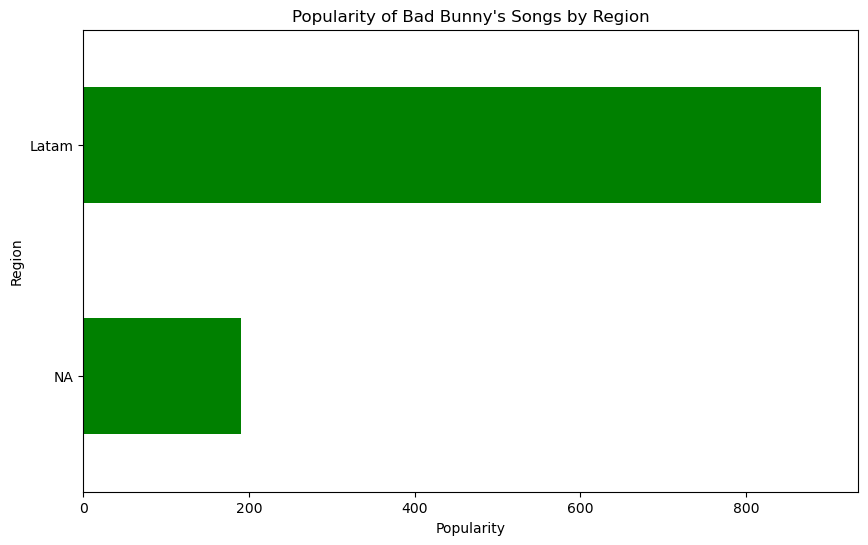

In [23]:
# To display a bar graph to compare the popularity of TS by region
plt.figure(figsize=(10, 6))
popularity_by_regionBB.plot(kind='barh', color='green')
plt.xlabel('Popularity')
plt.ylabel('Region')
plt.title("Popularity of Bad Bunny's Songs by Region")
plt.gca().invert_yaxis()  # Invert the y-axis for better readability



# Show the plot
plt.show()

# David

In [25]:
#Since explicitness is a boolean value the dataframe is filtered by the column explicitness looking for true values
explicitness = spotify_top_complete_v3.is_explicit.value_counts().loc[True]
explicitness_total = spotify_top_complete_v3.is_explicit.value_counts() #Total number of songs
explicitness

233

In [26]:
# Sum of explicit songs by region using the region ditionary merged with the clean dataframe
explicitness_region = spotify_top_complete_v3.groupby(['region'])['is_explicit'].sum()
region_count = spotify_top_complete_v3.groupby(['region'])['region'].count() #Total number of songs per region
percentage_region = explicitness_region/region_count*100 # Proportion of explicit songs (explicitness= True) divided by the total songs per region
percentage_region.to_frame().rename(columns={0:"explicit_top50"}).reset_index

<bound method DataFrame.reset_index of         explicit_top50
region                
Asia         13.333333
Europe       46.000000
Latam        63.333333
NA           49.000000>

In [28]:
# Top10 filters only the top ten songs by country and then does the same explicitness procedure for the top ten
top_10 = spotify_top_complete_v3[spotify_top_complete_v3['daily_rank']<=10]
explicitness_region10 = top_10.groupby(['region'])['is_explicit'].sum()
region_count10 = top_10.groupby(['region'])['region'].count()
percentage_region2 = explicitness_region10/region_count10*100
percentage_region2.to_frame().rename(columns={0:"explicit_top10"}).reset_index()

,region,explicit_top10
0,Asia,36.666667
1,Europe,60.000000
2,Latam,83.333333
3,NA,65.000000


Text(0, 0.5, 'Count of explicit songs in top charts (%)')

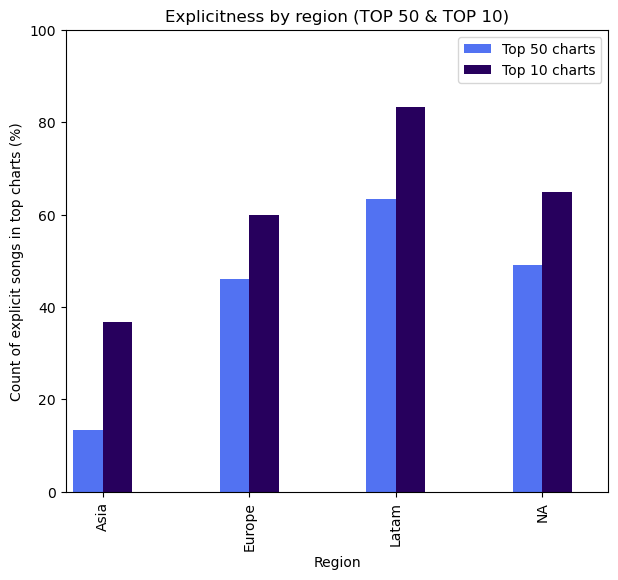

In [29]:
# Charting the explicitness per region for both top 10 and top 50 songs using pandas method
plt.figure(figsize=(7,6))
percentage_region.plot(kind='bar',x='region',y='explicit_top50', width=0.2, color = '#5272F2', position = 1,)
percentage_region2.plot(kind='bar',x='region',y='explicit_top10', width=0.2, color = '#27005D', position = 0)
plt.title('Explicitness by region (TOP 50 & TOP 10)')
plt.ylim((0,100))
plt.legend(["Top 50 charts","Top 10 charts"])
plt.xlabel('Region')
plt.ylabel('Count of explicit songs in top charts (%)')

Text(0, 0.5, 'Count of explicit songs in top 50 charts (%)')

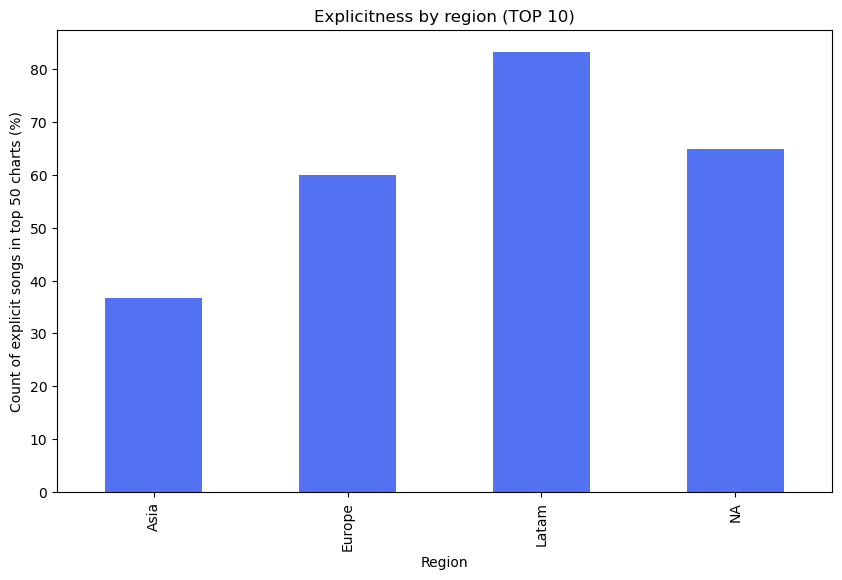

In [30]:
# Chart for the top 10 only
plt.figure(figsize=(10,6))
percentage_region2.plot(kind='bar',x='region',y='explicit_top10', color = '#5272F2')
plt.title('Explicitness by region (TOP 10)')
plt.xlabel('Region')
plt.ylabel('Count of explicit songs in top 50 charts (%)')


In [31]:
#Explicitness grouped for the countries of our selection, of the top 50 songs
explicitness_country= spotify_top_complete_v3.groupby(['Name'])['is_explicit'].sum() # Grouping by country and filtering the explicit songs
country_count = spotify_top_complete_v3.groupby(['Name'])['Name'].count() # Total number of songs per country
percentage_country = explicitness_country/country_count*100 # Proportion of explicit songs
percentage_country.to_frame().rename(columns={0:"explicit_top50"}).reset_index() # Convert to dataframe

,Name,explicit_top50
0,Canada,46.0
1,Chile,66.0
2,Colombia,68.0
3,France,66.0
4,"Korea, Republic of",12.0
5,Mexico,56.0
6,Romania,36.0
7,Singapore,18.0
8,"Taiwan, Province of China",10.0
9,United Kingdom,36.0


In [32]:
# Explicitness grouped for the countries of our selection, of the top 10 songs
explicitness_country10 = top_10.groupby(['Name'])['is_explicit'].sum() # Using the previously created dataframe of the top 10 songs the explicitness is filtered
country_count10 = top_10.groupby(['Name'])['Name'].count()
percentage_country2 = explicitness_country10/country_count10*100
percentage_country2.to_frame().rename(columns={0:"explicit_top10"}).reset_index()

,Name,explicit_top10
0,Canada,60.0
1,Chile,70.0
2,Colombia,90.0
3,France,70.0
4,"Korea, Republic of",40.0
5,Mexico,90.0
6,Romania,60.0
7,Singapore,50.0
8,"Taiwan, Province of China",20.0
9,United Kingdom,50.0


Text(0, 0.5, 'Count of explicit songs in top charts (%)')

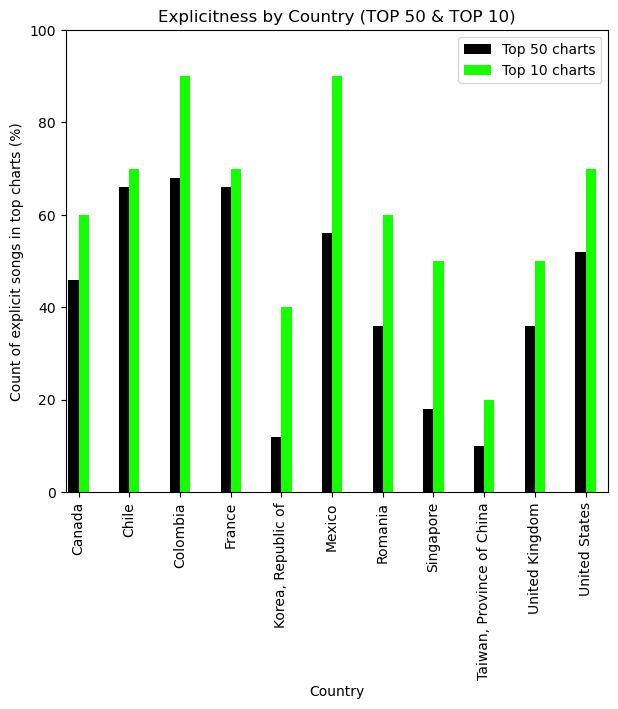

In [33]:
# Plotting the proportion of explicitness in the top 10 and 50 for each country of our selection.
plt.figure(figsize=(7,6))
percentage_country.plot(kind='bar',x='Name',y='explicit_top50', width=0.2, color = '#000000', position = 1,)
percentage_country2.plot(kind='bar',x='Name',y='explicit_top10', width=0.2, color = '#16FF00', position = 0)
plt.title('Explicitness by Country (TOP 50 & TOP 10)')
plt.ylim((0,100))
plt.legend(["Top 50 charts","Top 10 charts"])
plt.xlabel('Country')
plt.ylabel('Count of explicit songs in top charts (%)')

Text(0.5, 1.0, 'Danceability v Energy')

<Figure size 700x600 with 0 Axes>

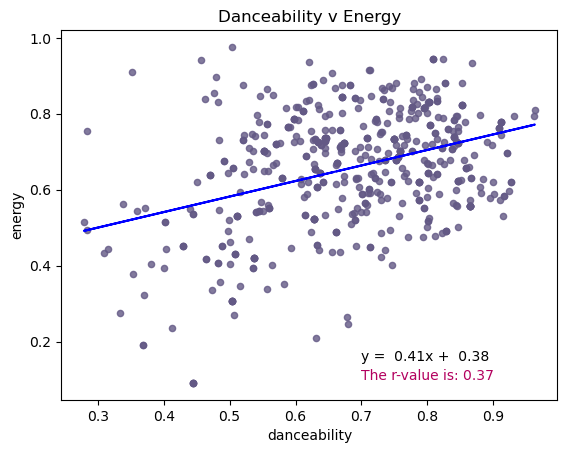

In [36]:
# Linear regression for Danceability and energy 
plt.figure(figsize=(7,6))
x_values = spotify_top_complete_v3['danceability'] #Filter danceability and set as x values
y_values = spotify_top_complete_v3['energy'] # Filter energy and set as y values
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values) #Linear regression
regress_values = b0 + b1*x_values # Linear equation for the variables
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2)) # Display
spotify_top_complete_v3.plot(kind = 'scatter',x = 'danceability', y = 'energy',color = '#635985',alpha=0.8) # Pandas plot
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0.7,.15), fontsize=10, color="#000000")
plt.text(0.7,.1,f'The r-value is: {round(rvalue,2)}',color= '#B3005E')
plt.title('Danceability v Energy')


# Miguel

# Spotify's correlations

In [40]:
#The Pearson correlation coefficient between "Popularaty" and "Danceability
popularity_rating = spotify_top_complete_v2.iloc[:,9]
energy_rating = spotify_top_complete_v2.iloc[:,14]
correlation = st.pearsonr(popularity_rating,energy_rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.02


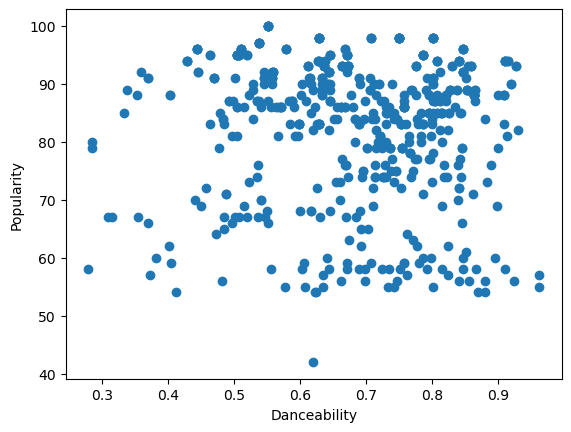

In [41]:
#Scatter Plot seeking a relaton between Danceability and populatiry

plt.scatter(spotify_top_complete_v3.iloc[:,14],spotify_top_complete_v3.iloc[:,9])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [42]:
#The Pearson correlation coefficient between "Popularaty" and "Energy"
popularity_rating = spotify_top_complete_v2.iloc[:,9]
energy_rating = spotify_top_complete_v2.iloc[:,15]
correlation = st.pearsonr(popularity_rating,energy_rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.0


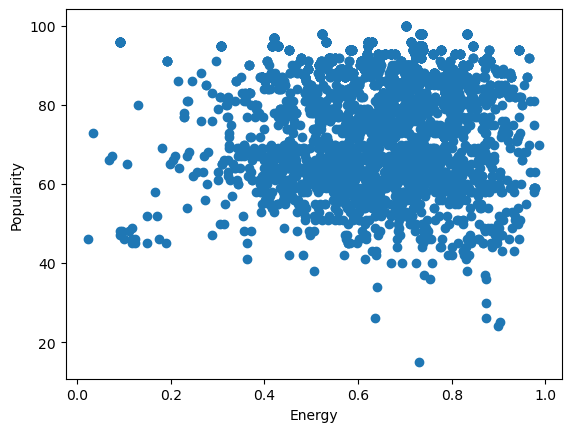

In [43]:
#Scatter Plot seeking a relaton between Popularity and Energy
plt.scatter(spotify_top_complete_v2.iloc[:,15],spotify_top_complete_v2.iloc[:,9])
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

In [44]:
#The Pearson correlation coefficient between "Popularaty" and " Rank"
popularity_rating = spotify_top_complete_v3.iloc[:,9]
rank_rating = spotify_top_complete_v3.iloc[:,5]
correlation = st.pearsonr(popularity_rating,rank_rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.21


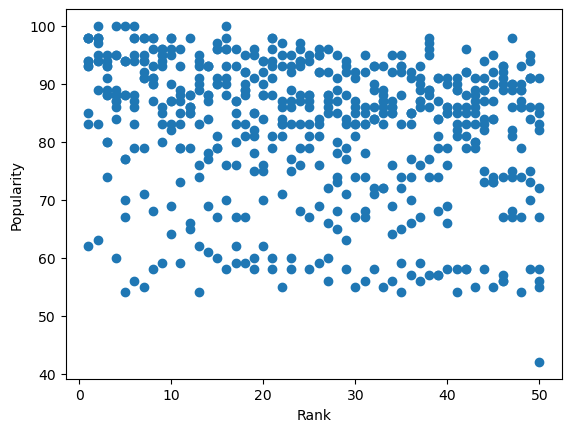

In [45]:
#Scatter Plot seeking a relaton between Rank and Popularity
plt.scatter(spotify_top_complete_v3.iloc[:,5],spotify_top_complete_v3.iloc[:,9])
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

In [46]:
# We have test possible correlations, now we are goint ot have another slice of the data only wiht the KPI´s to see all the relations.
# We slice the data for the selectec columns.

matrix_correlation = spotify_top_complete_v3[["popularity","danceability","energy","loudness","valence","tempo","acousticness","liveness","instrumentalness","speechiness","duration_ms"]].sort_values(by="popularity",ascending= False )
matrix_correlation

,popularity,danceability,energy,loudness,valence,tempo,acousticness,liveness,instrumentalness,speechiness,duration_ms
19918,100,0.552,0.702,-5.707,0.5640,169.994,0.117,0.1050,0.000021,0.1570,178426
24121,100,0.552,0.702,-5.707,0.5640,169.994,0.117,0.1050,0.000021,0.1570,178426
22007,100,0.552,0.702,-5.707,0.5640,169.994,0.117,0.1050,0.000021,0.1570,178426
2846,100,0.552,0.702,-5.707,0.5640,169.994,0.117,0.1050,0.000021,0.1570,178426
23767,100,0.552,0.702,-5.707,0.5640,169.994,0.117,0.1050,0.000021,0.1570,178426
...,...,...,...,...,...,...,...,...,...,...,...
19175,54,0.624,0.488,-8.275,0.2690,97.998,0.172,0.1690,0.000003,0.0340,156734
19210,54,0.623,0.877,-6.445,0.1280,82.523,0.343,0.0881,0.000000,0.2550,157090
19188,54,0.880,0.606,-10.446,0.0758,116.060,0.218,0.0878,0.170000,0.0772,134519
19218,54,0.870,0.691,-5.025,0.7980,129.961,0.129,0.0856,0.000000,0.0508,144000


In [47]:
#We use the method corr from Pandas to have a better picture of the possible correlations.
corre_spotify = matrix_correlation.corr()
corre_spotify

,popularity,danceability,energy,loudness,valence,tempo,acousticness,liveness,instrumentalness,speechiness,duration_ms
popularity,1.000000,-0.032207,-0.051728,-0.051743,-0.054558,-0.030439,-0.006140,0.026500,0.019094,-0.022830,0.051068
danceability,-0.032207,1.000000,0.370391,0.331218,0.486572,-0.111634,-0.314380,-0.124974,-0.117540,0.202004,-0.269869
energy,-0.051728,0.370391,1.000000,0.768657,0.426058,0.125438,-0.587697,0.036978,-0.043639,0.099060,-0.188476
loudness,-0.051743,0.331218,0.768657,1.000000,0.331428,0.075079,-0.486235,0.053728,-0.151149,0.024005,-0.118979
valence,-0.054558,0.486572,0.426058,0.331428,1.000000,0.062932,-0.225579,-0.101900,-0.109941,0.022803,-0.287255
tempo,-0.030439,-0.111634,0.125438,0.075079,0.062932,1.000000,0.008398,0.068961,-0.068065,0.090488,-0.109810
acousticness,-0.006140,-0.314380,-0.587697,-0.486235,-0.225579,0.008398,1.000000,-0.085974,0.068431,-0.092727,0.055803
liveness,0.026500,-0.124974,0.036978,0.053728,-0.101900,0.068961,-0.085974,1.000000,-0.035654,0.016251,0.066805
instrumentalness,0.019094,-0.117540,-0.043639,-0.151149,-0.109941,-0.068065,0.068431,-0.035654,1.000000,-0.087424,-0.095589
speechiness,-0.022830,0.202004,0.099060,0.024005,0.022803,0.090488,-0.092727,0.016251,-0.087424,1.000000,0.032864


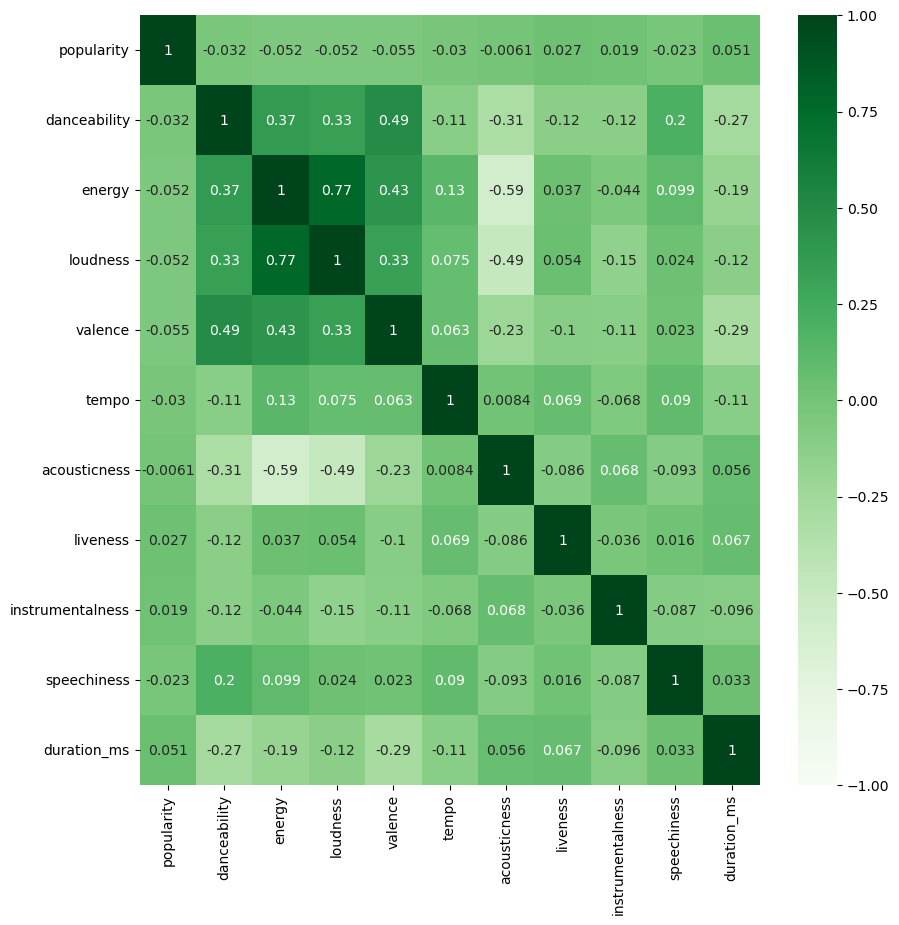

In [48]:
#Using the seaborn package with put into a heatmap all the posibble correlations for a better view.

plt.figure(figsize=(10,10))
tab = sns.heatmap(data=corre_spotify, vmin=-1, vmax=1, annot=True,cmap="Greens")

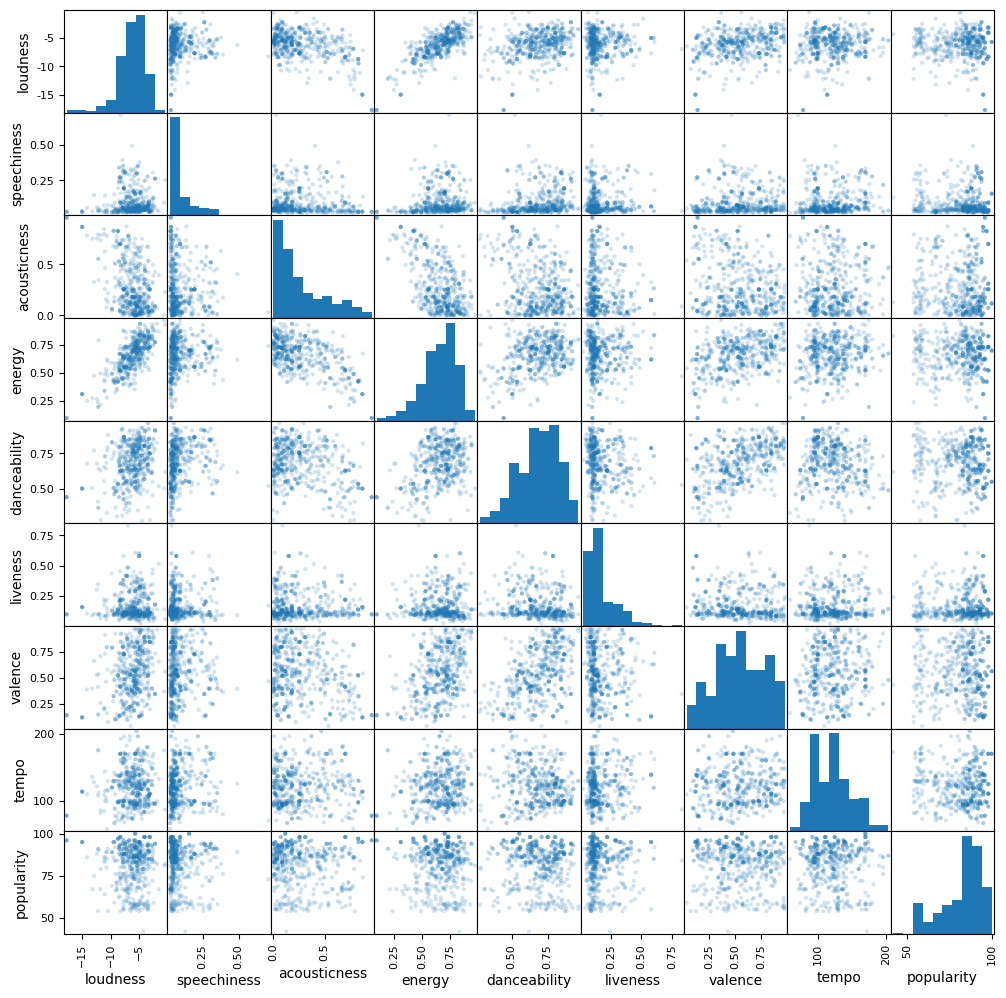

In [49]:
# Selecting a part of the KPI´s in order to yse the scatter matrix for Pandas to get a better view.

selected_columns = ["loudness", "speechiness", "acousticness","energy","danceability","liveness", "valence", "tempo", "popularity"]

selected_data = matrix_correlation[selected_columns]

# Create the scatter matrix
scatter_matrix(selected_data, alpha=0.2, figsize=(12, 12))

# Show the plot
plt.show()

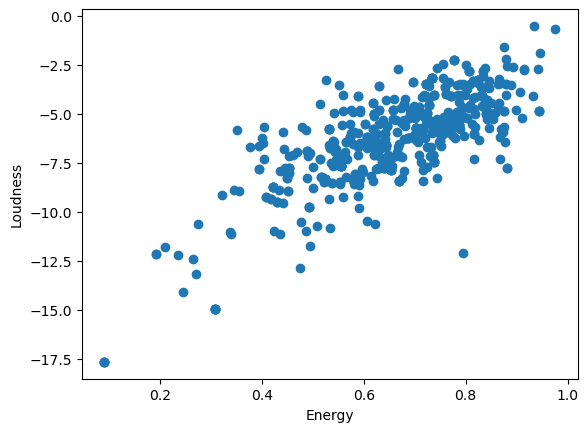

In [50]:
# We our finding form the Scatter Matrix we plot the strongest correlation of our Data Set.
# Plotting Energy vs Loudness
plt.scatter(spotify_top_complete_v3.iloc[:,15],spotify_top_complete_v3.iloc[:,17])
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

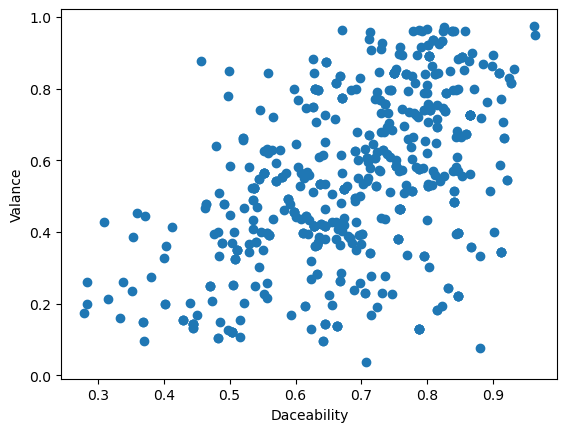

In [51]:
# Plotting Danceability vs Valance
plt.scatter(spotify_top_complete_v3.iloc[:,14],spotify_top_complete_v3.iloc[:,23])
plt.xlabel('Daceability')
plt.ylabel('Valance')
plt.show()

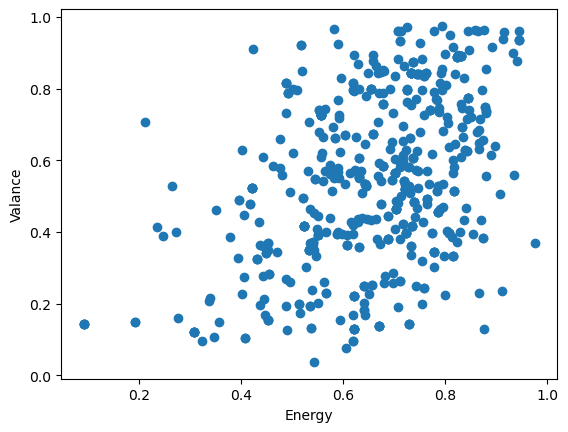

In [52]:
#Plotting Energy vs Valance
plt.scatter(spotify_top_complete_v3.iloc[:,15],spotify_top_complete_v3.iloc[:,23])
plt.xlabel('Energy')
plt.ylabel('Valance')
plt.show()

# Ivan

In [54]:
songs_danceability=spotify_top_complete_v3.sort_values(by=['danceability'],ascending=False)
songs_danceability[['name','Name','artists','danceability']].drop_duplicates(subset='name').reset_index(drop='index').head(10)


,name,Name,artists,danceability
0,Cariceps,Romania,"Dani Mocanu, Alex Velea",0.963
1,Țigancă Balcanică,Romania,"Tzanca Uraganu, Manele Mentolate",0.962
2,Arranca (feat. Omega),France,"Becky G, Omega",0.931
3,I KNOW ?,Canada,Travis Scott,0.927
4,Préjudice,France,Leto,0.924
5,AMARGURA,Colombia,KAROL G,0.920
6,Sprinter,United Kingdom,"Dave, Central Cee",0.916
7,Love Lee,"Korea, Republic of",AKMU,0.914
8,PERRO NEGRO,Colombia,"Bad Bunny, Feid",0.911
9,Ebal - From “Romina VTM” The Movie,Romania,"Bogdan DLP, Alex Velea",0.911


In [55]:
spotify_top1=spotify_top_complete_v3.loc[spotify_top_complete_v3['daily_rank'] == 1]
spot = spotify_top1[['Name','name','artists','danceability','energy','acousticness','instrumentalness','loudness','speechiness','valence']]
spot.reset_index()

,index,Name,name,artists,danceability,energy,acousticness,instrumentalness,loudness,speechiness,valence
0,2849,Canada,IDGAF (feat. Yeat),"Drake, Yeat",0.663,0.670,0.04640,0.000089,-8.399,0.2710,0.138
1,3199,Chile,ANDO,"Jere Klein, Gittobeatz",0.844,0.598,0.00362,0.002140,-7.950,0.0616,0.393
2,3549,Colombia,PERRO NEGRO,"Bad Bunny, Feid",0.911,0.778,0.08870,0.000022,-2.248,0.2620,0.345
3,7049,France,Petit génie,"Jungeli, Imen Es, Alonzo, Abou Debeing, Lossa",0.800,0.581,0.12600,0.000004,-5.925,0.2440,0.966
4,12299,"Korea, Republic of",Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
5,13972,Mexico,Que Onda,"Calle 24, Chino Pacas, Fuerza Regida",0.808,0.944,0.18300,0.000001,-4.863,0.0408,0.937
6,19222,Romania,Cleopatra,IDK,0.693,0.553,0.15000,0.000000,-8.580,0.2320,0.679
7,19922,Singapore,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
8,22022,"Taiwan, Province of China",Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
9,23772,United Kingdom,Strangers,Kenya Grace,0.628,0.523,0.70100,0.002740,-8.307,0.0946,0.416


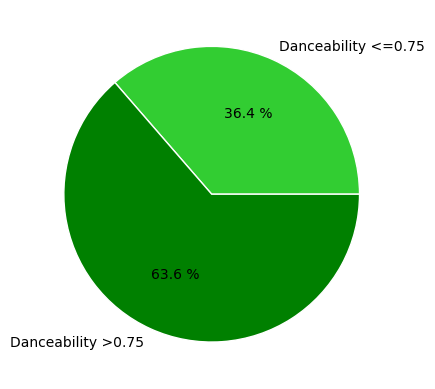

In [56]:
#Songs with danceability less than .75
spotify_top1_dance1=spotify_top1.loc[(spotify_top1['danceability']<=0.75)& spotify_top1['danceability']>0.5]
dance1=(spotify_top1_dance1.shape[0])/11

#Songs with danceability bigger than .75
spotify_top1_dance2=spotify_top1.loc[(spotify_top1['danceability']>0.75)]
dance2=(spotify_top1_dance2.shape[0])/11

#visualization
dance_val= [dance1,dance2]
dance_val
label = ['Danceability <=0.75', 'Danceability >0.75']
colores = ["#32CD32", "#008000"]
plt.pie(dance_val, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#36.4% of the top 1 songs are below .75 in the danceability measure

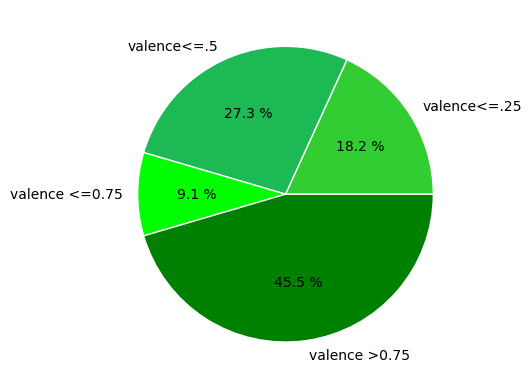

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,region
7049,France,FR,6z0GwK274ToNmvxfyYPuHw,Petit génie,"Jungeli, Imen Es, Alonzo, Abou Debeing, Lossa",1,0,49,2023-10-24,83,...,-5.925,0,0.2440,0.126,0.000004,0.2240,0.966,126.046,4,Europe
12299,"Korea, Republic of",KR,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,2023-10-24,98,...,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4,Asia
13972,Mexico,MX,6uIIdjYTxxpWOyWuVXrKQO,Que Onda,"Calle 24, Chino Pacas, Fuerza Regida",1,0,49,2023-10-24,94,...,-4.863,0,0.0408,0.183,0.000001,0.1380,0.937,124.934,3,Latam
19922,Singapore,SG,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,2023-10-24,98,...,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4,Asia
22022,"Taiwan, Province of China",TW,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,2023-10-24,98,...,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4,Asia


In [57]:
#Songs with valence less than .25
spotify_top1_valence1=spotify_top1.loc[(spotify_top1['valence']<=0.25)& spotify_top1['valence']>0]
valence1=(spotify_top1_valence1.shape[0])/11

#Songs with valence less than .5
spotify_top1_valence2=spotify_top1.loc[(spotify_top1['valence']<=0.5)& (spotify_top1['valence']>0.25)]
valence2=(spotify_top1_valence2.shape[0])/11

#Songs with valence less than .75
spotify_top1_valence3=spotify_top1.loc[(spotify_top1['valence']<=0.75)& (spotify_top1['valence']>0.5)]
valence3=(spotify_top1_valence3.shape[0])/11

#Songs with valence less than 1
spotify_top1_valence4=spotify_top1.loc[(spotify_top1['valence']<=1)& (spotify_top1['valence']>0.75)]
valence4=(spotify_top1_valence4.shape[0])/11

#visualization
valence_val= [valence1,valence2,valence3,valence4]
valence_val
label = ['valence<=.25','valence<=.5','valence <=0.75', 'valence >0.75']
colores = ["#32CD32", "#1DB954","#00FF00","#008000"]
plt.pie(valence_val, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#36.4% of the top 1 songs are below .75 in the valence measure


spotify_top1_valence4

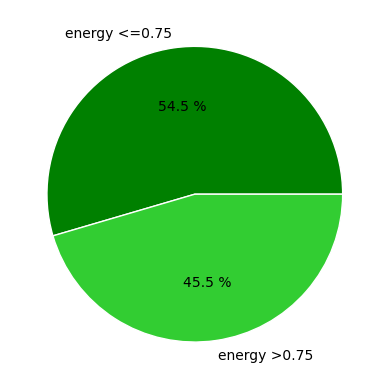

In [58]:
#Songs with energy less than .75
spotify_top1_energy3=spotify_top1.loc[(spotify_top1['energy']<=0.75)& (spotify_top1['energy']>0.5)]
energy3=(spotify_top1_energy3.shape[0])/11

#Songs with energy less than 1
spotify_top1_energy4=spotify_top1.loc[(spotify_top1['energy']<=1)& (spotify_top1['energy']>0.75)]
energy4=(spotify_top1_energy4.shape[0])/11

#visualization
energy_ene= [energy3,energy4]
energy_ene
label = ['energy <=0.75', 'energy >0.75']
colores = ["#008000", "#32CD32"]
plt.pie(energy_ene, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#54.5% of the top 1 songs are below .75 in the energy measure